In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import squareform

np.random.seed(42)

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Librerías importadas correctamente")
print("Semilla aleatoria fijada en 42 para reproducibilidad")


Librerías importadas correctamente
Semilla aleatoria fijada en 42 para reproducibilidad


In [23]:
print("CARGANDO DATOS ORIGINALES Y MATRICES DE DISTANCIA")
print("="*60)

column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]

df = pd.read_csv('../../../datos/adult.data', names=column_names, na_values=' ?')

print(f"Dataset original cargado: {df.shape[0]} filas, {df.shape[1]} columnas")

categorical_missing = ['workclass', 'occupation', 'native_country']
for col in categorical_missing:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)

df['income_binary'] = (df['income'] == ' >50K').astype(int)
df['sex_binary'] = (df['sex'] == ' Female').astype(int)

print("\nCargando matrices de distancia de Gower...")
distance_matrix_5k = np.load('../ej3/distance_matrix_5000.npy')
distance_matrix_10k = np.load('../ej3/distance_matrix_10000.npy')

print(f"Matriz 5K: {distance_matrix_5k.shape}")
print(f"Matriz 10K: {distance_matrix_10k.shape}")

print("\nDatos cargados correctamente")


CARGANDO DATOS ORIGINALES Y MATRICES DE DISTANCIA
Dataset original cargado: 32561 filas, 15 columnas

Cargando matrices de distancia de Gower...
Matriz 5K: (5000, 5000)
Matriz 10K: (10000, 10000)

Datos cargados correctamente


In [24]:
print("SELECCIÓN DE MUESTRAS (CONSISTENTE CON EJERCICIO 3)")
print("="*60)

sample_5k_indices = df.sample(n=5000, random_state=42).index.tolist()
sample_10k_indices = df.sample(n=10000, random_state=42).index.tolist()

sample_5k_data = df.loc[sample_5k_indices].copy()
sample_10k_data = df.loc[sample_10k_indices].copy()

print(f"Muestra 5K: {len(sample_5k_data)} registros")
print(f"Muestra 10K: {len(sample_10k_data)} registros")

print("\nÍndices de muestra 5K (primeros 10):", sample_5k_indices[:10])
print("Índices de muestra 10K (primeros 10):", sample_10k_indices[:10])

print("\nMuestras preparadas correctamente")


SELECCIÓN DE MUESTRAS (CONSISTENTE CON EJERCICIO 3)
Muestra 5K: 5000 registros
Muestra 10K: 10000 registros

Índices de muestra 5K (primeros 10): [14160, 27048, 28868, 5667, 7827, 15382, 4641, 8943, 216, 5121]
Índices de muestra 10K (primeros 10): [14160, 27048, 28868, 5667, 7827, 15382, 4641, 8943, 216, 5121]

Muestras preparadas correctamente


In [25]:
print("EVALUACIÓN DEL NÚMERO ÓPTIMO DE CLUSTERS - MUESTRA 5K")
print("="*60)

k_range = range(2, 11)
silhouette_scores_5k = []
davies_bouldin_scores_5k = []

print("Evaluando métricas para diferentes valores de k...")
for k in k_range:
    print(f"  Procesando k={k}...", end=" ")
    
    clusterer = AgglomerativeClustering(
        n_clusters=k,
        metric='precomputed',
        linkage='average'
    )
    labels = clusterer.fit_predict(distance_matrix_5k)
    
    silhouette = silhouette_score(distance_matrix_5k, labels, metric='precomputed')
    davies_bouldin = davies_bouldin_score(distance_matrix_5k, labels)
    
    silhouette_scores_5k.append(silhouette)
    davies_bouldin_scores_5k.append(davies_bouldin)
    
    print(f"Silhouette: {silhouette:.4f}, Davies-Bouldin: {davies_bouldin:.4f}")

print("\nEvaluación completada para muestra 5K")


EVALUACIÓN DEL NÚMERO ÓPTIMO DE CLUSTERS - MUESTRA 5K
Evaluando métricas para diferentes valores de k...
  Procesando k=2... Silhouette: 0.3430, Davies-Bouldin: 0.5000
  Procesando k=3... Silhouette: 0.2713, Davies-Bouldin: 0.7738
  Procesando k=4... Silhouette: 0.2559, Davies-Bouldin: 0.7312
  Procesando k=5... Silhouette: 0.2049, Davies-Bouldin: 0.8655
  Procesando k=6... Silhouette: 0.1561, Davies-Bouldin: 1.1461
  Procesando k=7... Silhouette: 0.1198, Davies-Bouldin: 1.1163
  Procesando k=8... Silhouette: 0.1035, Davies-Bouldin: 1.4623
  Procesando k=9... Silhouette: 0.0928, Davies-Bouldin: 1.4720
  Procesando k=10... Silhouette: 0.0886, Davies-Bouldin: 1.5733

Evaluación completada para muestra 5K


In [26]:
print("EVALUACIÓN DEL NÚMERO ÓPTIMO DE CLUSTERS - MUESTRA 10K")
print("="*60)

silhouette_scores_10k = []
davies_bouldin_scores_10k = []

print("Evaluando métricas para diferentes valores de k...")
for k in k_range:
    print(f"  Procesando k={k}...", end=" ")
    
    clusterer = AgglomerativeClustering(
        n_clusters=k,
        metric='precomputed',
        linkage='average'
    )
    labels = clusterer.fit_predict(distance_matrix_10k)
    
    silhouette = silhouette_score(distance_matrix_10k, labels, metric='precomputed')
    davies_bouldin = davies_bouldin_score(distance_matrix_10k, labels)
    
    silhouette_scores_10k.append(silhouette)
    davies_bouldin_scores_10k.append(davies_bouldin)
    
    print(f"Silhouette: {silhouette:.4f}, Davies-Bouldin: {davies_bouldin:.4f}")

print("\nEvaluación completada para muestra 10K")


EVALUACIÓN DEL NÚMERO ÓPTIMO DE CLUSTERS - MUESTRA 10K
Evaluando métricas para diferentes valores de k...
  Procesando k=2... Silhouette: 0.3457, Davies-Bouldin: 0.7091
  Procesando k=3... Silhouette: 0.2752, Davies-Bouldin: 0.9991
  Procesando k=4... Silhouette: 0.2431, Davies-Bouldin: 0.7912
  Procesando k=5... Silhouette: 0.2101, Davies-Bouldin: 0.8508
  Procesando k=6... Silhouette: 0.1982, Davies-Bouldin: 1.0240
  Procesando k=7... Silhouette: 0.1625, Davies-Bouldin: 0.9134
  Procesando k=8... Silhouette: 0.1370, Davies-Bouldin: 1.0234
  Procesando k=9... Silhouette: 0.1033, Davies-Bouldin: 1.0710
  Procesando k=10... Silhouette: 0.0939, Davies-Bouldin: 1.2759

Evaluación completada para muestra 10K


In [27]:
print("DETERMINACIÓN DE K ÓPTIMO")
print("="*60)

# K óptimo basado en Silhouette (mayor es mejor)
optimal_k_silhouette_5k = k_range[np.argmax(silhouette_scores_5k)]
optimal_k_silhouette_10k = k_range[np.argmax(silhouette_scores_10k)]

# K óptimo basado en Davies-Bouldin (menor es mejor)
optimal_k_db_5k = k_range[np.argmin(davies_bouldin_scores_5k)]
optimal_k_db_10k = k_range[np.argmin(davies_bouldin_scores_10k)]

print("\nMUESTRA 5K:")
print(f"  Silhouette Score óptimo: k={optimal_k_silhouette_5k} (score: {max(silhouette_scores_5k):.4f})")
print(f"  Davies-Bouldin Score óptimo: k={optimal_k_db_5k} (score: {min(davies_bouldin_scores_5k):.4f})")

print("\nMUESTRA 10K:")
print(f"  Silhouette Score óptimo: k={optimal_k_silhouette_10k} (score: {max(silhouette_scores_10k):.4f})")
print(f"  Davies-Bouldin Score óptimo: k={optimal_k_db_10k} (score: {min(davies_bouldin_scores_10k):.4f})")

optimal_k_5k = optimal_k_silhouette_5k
optimal_k_10k = optimal_k_silhouette_10k

print(f"\nSeleccionado k={optimal_k_5k} para muestra 5K")
print(f"Seleccionado k={optimal_k_10k} para muestra 10K")


DETERMINACIÓN DE K ÓPTIMO

MUESTRA 5K:
  Silhouette Score óptimo: k=2 (score: 0.3430)
  Davies-Bouldin Score óptimo: k=2 (score: 0.5000)

MUESTRA 10K:
  Silhouette Score óptimo: k=2 (score: 0.3457)
  Davies-Bouldin Score óptimo: k=2 (score: 0.7091)

Seleccionado k=2 para muestra 5K
Seleccionado k=2 para muestra 10K


VISUALIZACIÓN DE MÉTRICAS DE CALIDAD


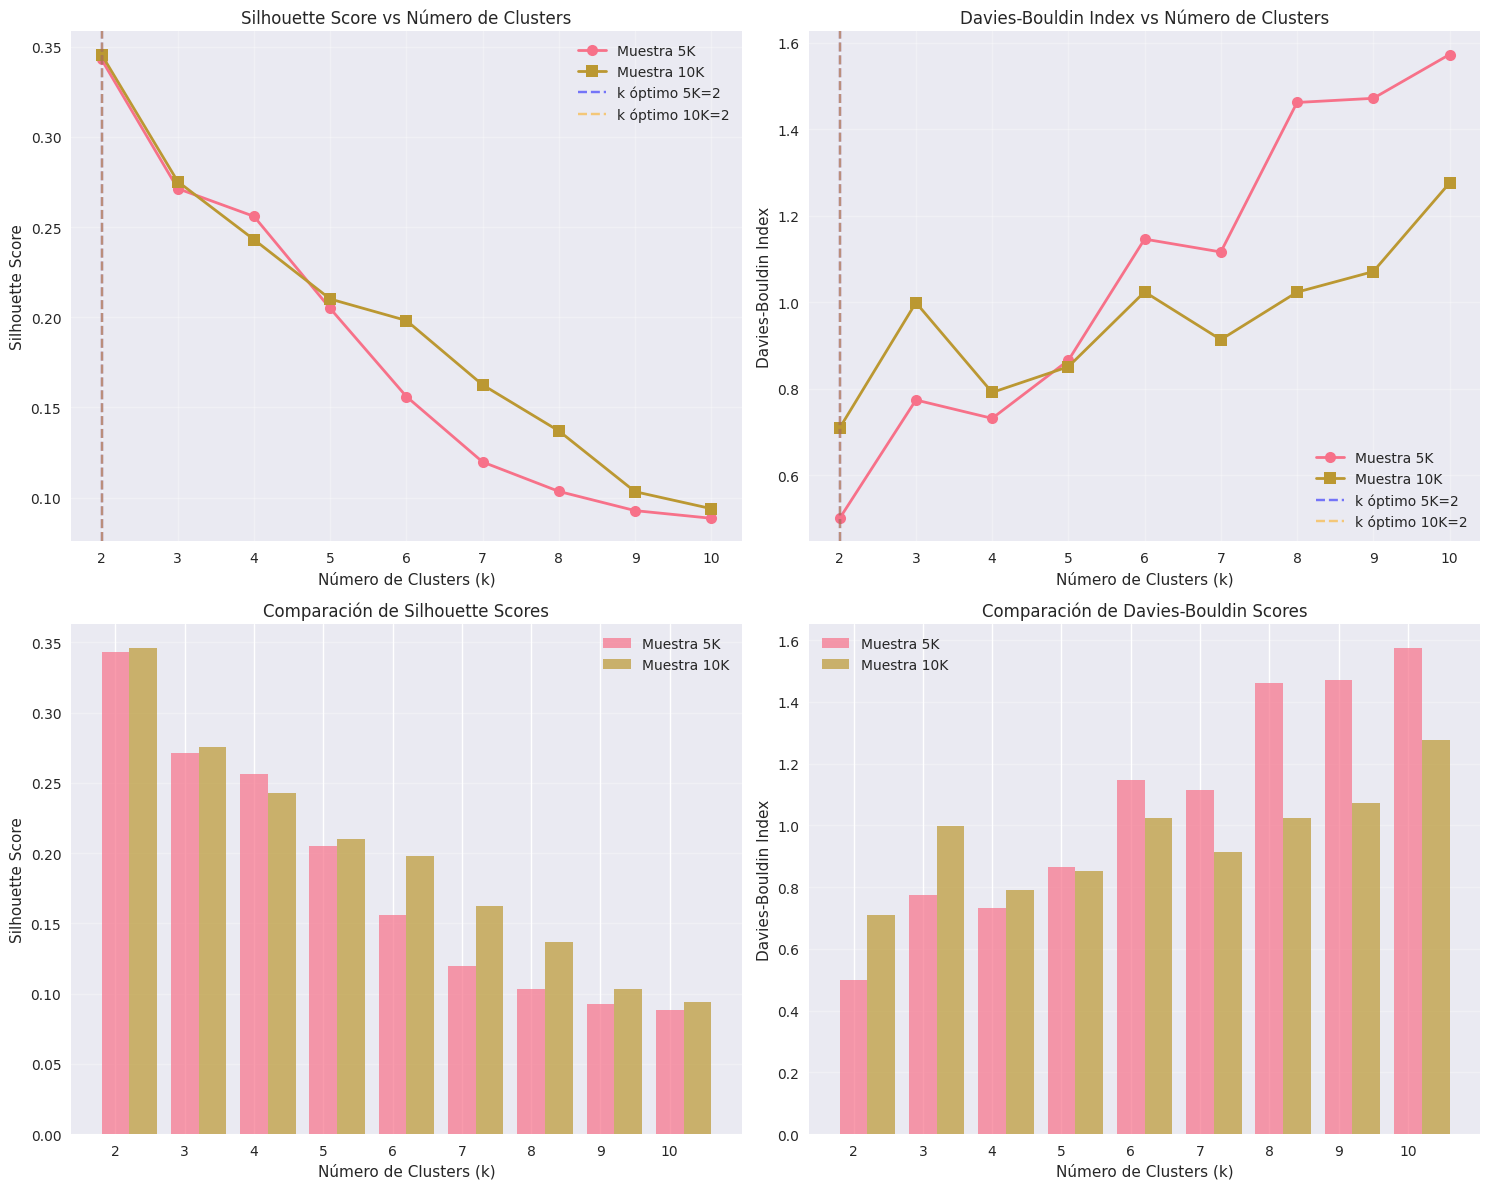

In [28]:
print("VISUALIZACIÓN DE MÉTRICAS DE CALIDAD")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Silhouette Scores
axes[0, 0].plot(k_range, silhouette_scores_5k, 'o-', linewidth=2, markersize=8, label='Muestra 5K')
axes[0, 0].plot(k_range, silhouette_scores_10k, 's-', linewidth=2, markersize=8, label='Muestra 10K')
axes[0, 0].axvline(x=optimal_k_5k, color='blue', linestyle='--', alpha=0.5, label=f'k óptimo 5K={optimal_k_5k}')
axes[0, 0].axvline(x=optimal_k_10k, color='orange', linestyle='--', alpha=0.5, label=f'k óptimo 10K={optimal_k_10k}')
axes[0, 0].set_xlabel('Número de Clusters (k)')
axes[0, 0].set_ylabel('Silhouette Score')
axes[0, 0].set_title('Silhouette Score vs Número de Clusters')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Davies-Bouldin Scores
axes[0, 1].plot(k_range, davies_bouldin_scores_5k, 'o-', linewidth=2, markersize=8, label='Muestra 5K')
axes[0, 1].plot(k_range, davies_bouldin_scores_10k, 's-', linewidth=2, markersize=8, label='Muestra 10K')
axes[0, 1].axvline(x=optimal_k_db_5k, color='blue', linestyle='--', alpha=0.5, label=f'k óptimo 5K={optimal_k_db_5k}')
axes[0, 1].axvline(x=optimal_k_db_10k, color='orange', linestyle='--', alpha=0.5, label=f'k óptimo 10K={optimal_k_db_10k}')
axes[0, 1].set_xlabel('Número de Clusters (k)')
axes[0, 1].set_ylabel('Davies-Bouldin Index')
axes[0, 1].set_title('Davies-Bouldin Index vs Número de Clusters')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Comparación Silhouette
axes[1, 0].bar(range(len(k_range)), silhouette_scores_5k, alpha=0.7, label='Muestra 5K', width=0.4)
axes[1, 0].bar([x + 0.4 for x in range(len(k_range))], silhouette_scores_10k, alpha=0.7, label='Muestra 10K', width=0.4)
axes[1, 0].set_xticks(range(len(k_range)))
axes[1, 0].set_xticklabels(k_range)
axes[1, 0].set_xlabel('Número de Clusters (k)')
axes[1, 0].set_ylabel('Silhouette Score')
axes[1, 0].set_title('Comparación de Silhouette Scores')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Comparación Davies-Bouldin
axes[1, 1].bar(range(len(k_range)), davies_bouldin_scores_5k, alpha=0.7, label='Muestra 5K', width=0.4)
axes[1, 1].bar([x + 0.4 for x in range(len(k_range))], davies_bouldin_scores_10k, alpha=0.7, label='Muestra 10K', width=0.4)
axes[1, 1].set_xticks(range(len(k_range)))
axes[1, 1].set_xticklabels(k_range)
axes[1, 1].set_xlabel('Número de Clusters (k)')
axes[1, 1].set_ylabel('Davies-Bouldin Index')
axes[1, 1].set_title('Comparación de Davies-Bouldin Scores')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


GENERACIÓN DE DENDOGRAMAS - MUESTRA 5K
Linkage calculado para muestra 5K
Forma de Z: (4999, 4)


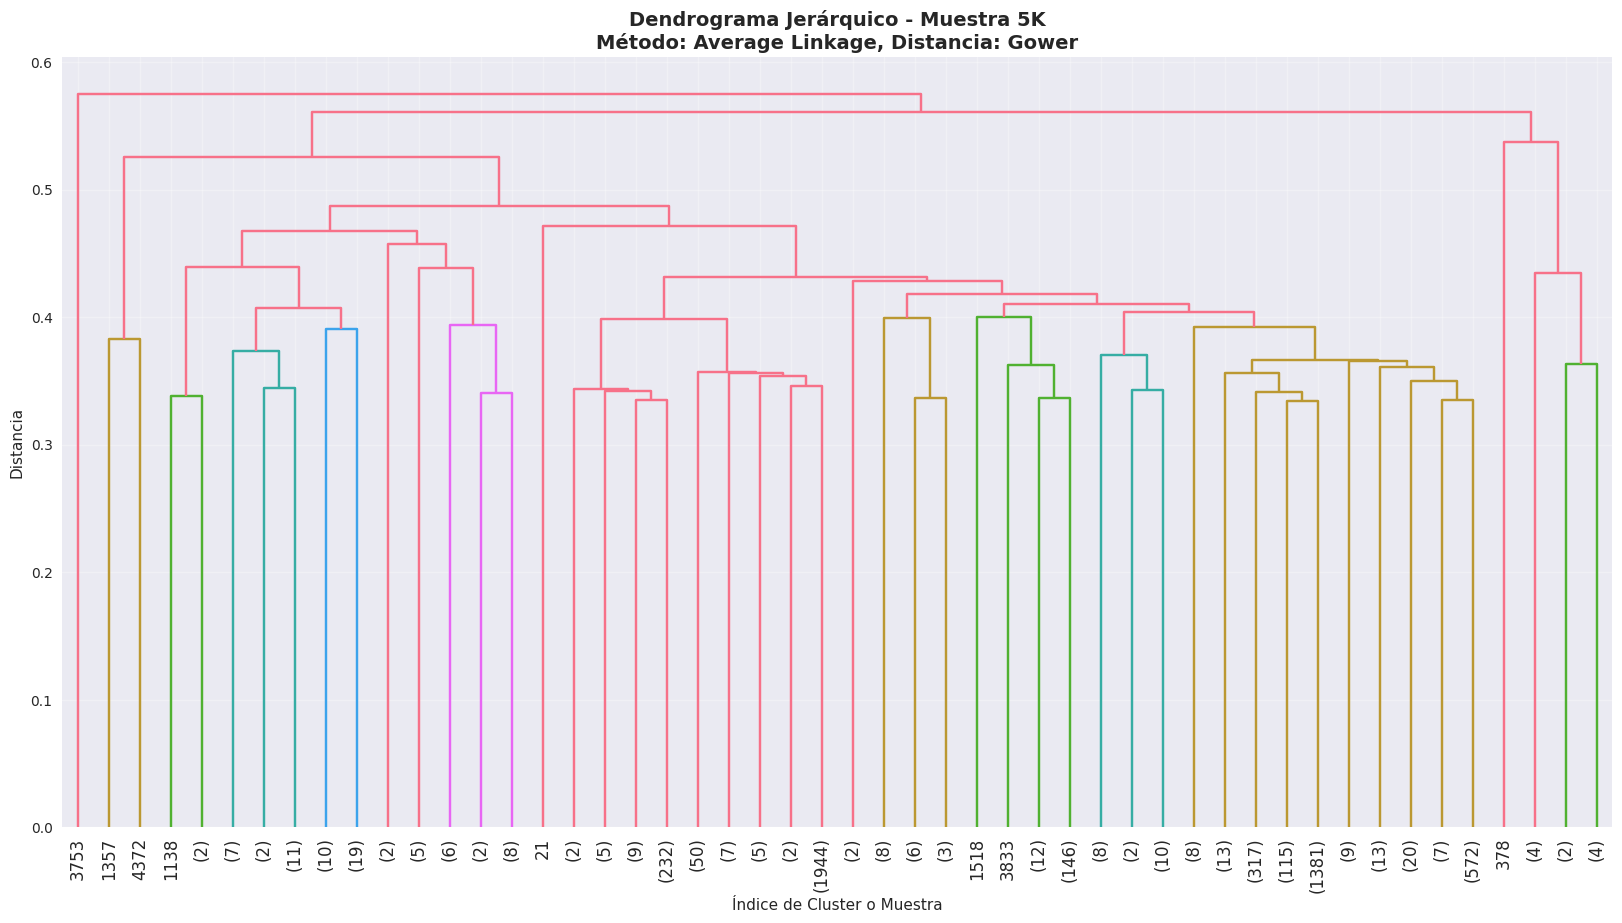

Dendrograma para muestra 5K generado


In [29]:
print("GENERACIÓN DE DENDOGRAMAS - MUESTRA 5K")
print("="*60)

# Convertir matriz de distancia simétrica a formato condensado
distance_condensed_5k = squareform(distance_matrix_5k)

# Calcular linkage
Z_5k = linkage(distance_condensed_5k, method='average', metric='precomputed')

print("Linkage calculado para muestra 5K")
print(f"Forma de Z: {Z_5k.shape}")

# Crear dendrograma
plt.figure(figsize=(20, 10))
dendrogram(Z_5k, truncate_mode='lastp', p=min(50, len(Z_5k)), leaf_rotation=90., leaf_font_size=12.)
plt.title('Dendrograma Jerárquico - Muestra 5K\nMétodo: Average Linkage, Distancia: Gower', fontsize=14, fontweight='bold')
plt.xlabel('Índice de Cluster o Muestra')
plt.ylabel('Distancia')
plt.grid(True, alpha=0.3)
plt.show()

print("Dendrograma para muestra 5K generado")


GENERACIÓN DE DENDOGRAMAS - MUESTRA 10K
Linkage calculado para muestra 10K
Forma de Z: (9999, 4)


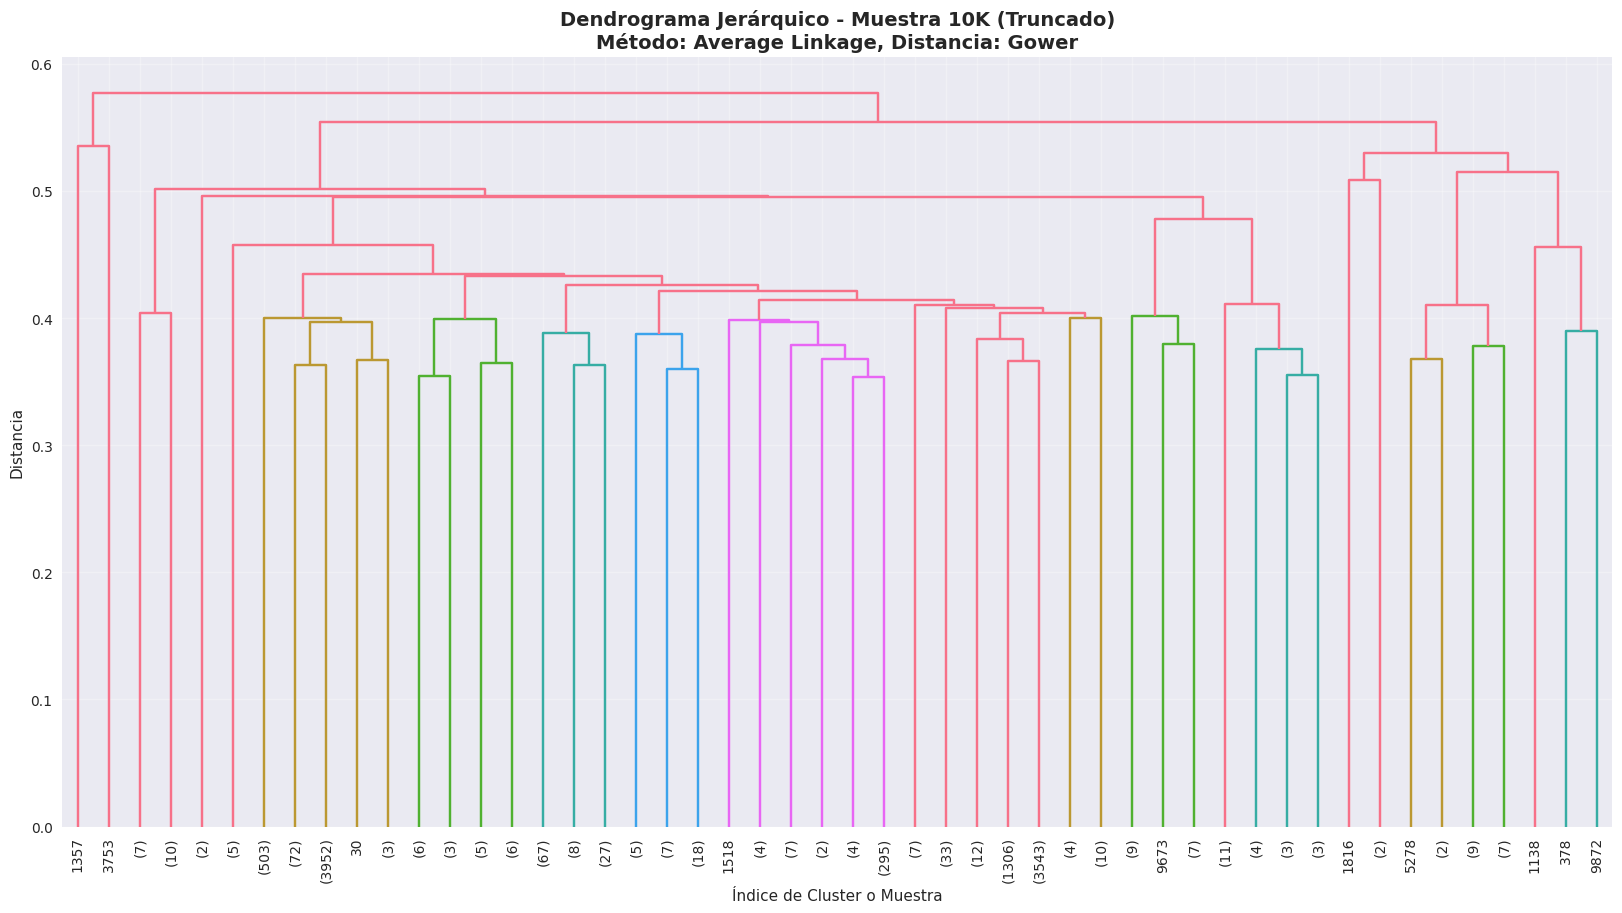

Dendrograma para muestra 10K generado


In [30]:
print("GENERACIÓN DE DENDOGRAMAS - MUESTRA 10K")
print("="*60)

# Convertir matriz de distancia simétrica a formato condensado
distance_condensed_10k = squareform(distance_matrix_10k)

# Calcular linkage
Z_10k = linkage(distance_condensed_10k, method='average', metric='precomputed')

print("Linkage calculado para muestra 10K")
print(f"Forma de Z: {Z_10k.shape}")

# Crear dendrograma truncado (solo últimos 50 clusters para mejor visualización)
plt.figure(figsize=(20, 10))
dendrogram(Z_10k, truncate_mode='lastp', p=min(50, len(Z_10k)), leaf_rotation=90., leaf_font_size=10.)
plt.title('Dendrograma Jerárquico - Muestra 10K (Truncado)\nMétodo: Average Linkage, Distancia: Gower', fontsize=14, fontweight='bold')
plt.xlabel('Índice de Cluster o Muestra')
plt.ylabel('Distancia')
plt.grid(True, alpha=0.3)
plt.show()

print("Dendrograma para muestra 10K generado")


In [31]:
print("CLUSTERING FINAL CON K ÓPTIMO - MUESTRA 5K")
print("="*60)

clusterer_5k = AgglomerativeClustering(
    n_clusters=optimal_k_5k,
    metric='precomputed',
    linkage='average'
)

labels_5k = clusterer_5k.fit_predict(distance_matrix_5k)

silhouette_final_5k = silhouette_score(distance_matrix_5k, labels_5k, metric='precomputed')
davies_bouldin_final_5k = davies_bouldin_score(distance_matrix_5k, labels_5k)

print(f"Clustering aplicado con k={optimal_k_5k}")
print(f"Silhouette Score final: {silhouette_final_5k:.4f}")
print(f"Davies-Bouldin Score final: {davies_bouldin_final_5k:.4f}")

# Distribución de clusters
unique, counts = np.unique(labels_5k, return_counts=True)
print(f"\nDistribución de clusters:")
for cluster_id, count in zip(unique, counts):
    print(f"  Cluster {cluster_id}: {count} registros ({count/len(labels_5k)*100:.2f}%)")

sample_5k_data['cluster'] = labels_5k
print("\nEtiquetas de clusters asignadas a muestra 5K")


CLUSTERING FINAL CON K ÓPTIMO - MUESTRA 5K
Clustering aplicado con k=2
Silhouette Score final: 0.3430
Davies-Bouldin Score final: 0.5000

Distribución de clusters:
  Cluster 0: 4999 registros (99.98%)
  Cluster 1: 1 registros (0.02%)

Etiquetas de clusters asignadas a muestra 5K


In [32]:
print("CLUSTERING FINAL CON K ÓPTIMO - MUESTRA 10K")
print("="*60)

clusterer_10k = AgglomerativeClustering(
    n_clusters=optimal_k_10k,
    metric='precomputed',
    linkage='average'
)

labels_10k = clusterer_10k.fit_predict(distance_matrix_10k)

silhouette_final_10k = silhouette_score(distance_matrix_10k, labels_10k, metric='precomputed')
davies_bouldin_final_10k = davies_bouldin_score(distance_matrix_10k, labels_10k)

print(f"Clustering aplicado con k={optimal_k_10k}")
print(f"Silhouette Score final: {silhouette_final_10k:.4f}")
print(f"Davies-Bouldin Score final: {davies_bouldin_final_10k:.4f}")

# Distribución de clusters
unique, counts = np.unique(labels_10k, return_counts=True)
print(f"\nDistribución de clusters:")
for cluster_id, count in zip(unique, counts):
    print(f"  Cluster {cluster_id}: {count} registros ({count/len(labels_10k)*100:.2f}%)")

sample_10k_data['cluster'] = labels_10k
print("\nEtiquetas de clusters asignadas a muestra 10K")


CLUSTERING FINAL CON K ÓPTIMO - MUESTRA 10K
Clustering aplicado con k=2
Silhouette Score final: 0.3457
Davies-Bouldin Score final: 0.7091

Distribución de clusters:
  Cluster 0: 9998 registros (99.98%)
  Cluster 1: 2 registros (0.02%)

Etiquetas de clusters asignadas a muestra 10K


In [39]:
print("ANÁLISIS DE COHESIÓN DE CLUSTERS")
print("="*60)
print("Análisis complementario a Davies-Bouldin: cohesión interna vs separación entre clusters")
print()

def analyze_cluster_cohesion(distance_matrix, labels):
    """Analiza cohesión interna y separación entre clusters"""
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)
    
    intra_cluster_distances = []
    inter_cluster_distances = []
    
    for i, label_i in enumerate(unique_labels):
        cluster_i_mask = labels == label_i
        cluster_i_indices = np.where(cluster_i_mask)[0]
        
        # Distancias intra-cluster
        if len(cluster_i_indices) > 1:
            intra = []
            for idx1 in cluster_i_indices:
                for idx2 in cluster_i_indices:
                    if idx1 < idx2:
                        intra.append(distance_matrix[idx1, idx2])
            intra_cluster_distances.extend(intra)
        
        # Distancias inter-cluster
        for j, label_j in enumerate(unique_labels):
            if i < j:
                cluster_j_mask = labels == label_j
                cluster_j_indices = np.where(cluster_j_mask)[0]
                
                inter = []
                for idx1 in cluster_i_indices:
                    for idx2 in cluster_j_indices:
                        inter.append(distance_matrix[idx1, idx2])
                inter_cluster_distances.extend(inter)
    
    return {
        'intra_mean': np.mean(intra_cluster_distances),
        'intra_std': np.std(intra_cluster_distances),
        'intra_min': np.min(intra_cluster_distances),
        'intra_max': np.max(intra_cluster_distances),
        'inter_mean': np.mean(inter_cluster_distances),
        'inter_std': np.std(inter_cluster_distances),
        'inter_min': np.min(inter_cluster_distances),
        'inter_max': np.max(inter_cluster_distances),
        'cohesion_ratio': np.mean(intra_cluster_distances) / np.mean(inter_cluster_distances) if np.mean(inter_cluster_distances) > 0 else 0
    }

# Analizar muestra 5K
print("MUESTRA 5K:")
print("-" * 60)
cohesion_5k = analyze_cluster_cohesion(distance_matrix_5k, labels_5k)
print(f"Distancia intra-cluster (dentro del mismo cluster):")
print(f"  Promedio: {cohesion_5k['intra_mean']:.4f} ± {cohesion_5k['intra_std']:.4f}")
print(f"  Rango: [{cohesion_5k['intra_min']:.4f}, {cohesion_5k['intra_max']:.4f}]")
print(f"\nDistancia inter-cluster (entre clusters diferentes):")
print(f"  Promedio: {cohesion_5k['inter_mean']:.4f} ± {cohesion_5k['inter_std']:.4f}")
print(f"  Rango: [{cohesion_5k['inter_min']:.4f}, {cohesion_5k['inter_max']:.4f}]")
print(f"\nRatio de cohesión (intra/inter): {cohesion_5k['cohesion_ratio']:.4f}")
print(f"  → Cuanto MENOR el ratio, MEJOR (clusters más cohesivos y separados)")
print(f"  → Valores <0.5 indican excelente cohesión y separación")
print(f"  → Valores cercanos a 1 indican clusters poco distintivos")

# Analizar muestra 10K
print("\n\nMUESTRA 10K:")
print("-" * 60)
cohesion_10k = analyze_cluster_cohesion(distance_matrix_10k, labels_10k)
print(f"Distancia intra-cluster (dentro del mismo cluster):")
print(f"  Promedio: {cohesion_10k['intra_mean']:.4f} ± {cohesion_10k['intra_std']:.4f}")
print(f"  Rango: [{cohesion_10k['intra_min']:.4f}, {cohesion_10k['intra_max']:.4f}]")
print(f"\nDistancia inter-cluster (entre clusters diferentes):")
print(f"  Promedio: {cohesion_10k['inter_mean']:.4f} ± {cohesion_10k['inter_std']:.4f}")
print(f"  Rango: [{cohesion_10k['inter_min']:.4f}, {cohesion_10k['inter_max']:.4f}]")
print(f"\nRatio de cohesión (intra/inter): {cohesion_10k['cohesion_ratio']:.4f}")
print(f"  → Cuanto MENOR el ratio, MEJOR (clusters más cohesivos y separados)")
print(f"  → Valores <0.5 indican excelente cohesión y separación")
print(f"  → Valores cercanos a 1 indican clusters poco distintivos")

ANÁLISIS DE COHESIÓN DE CLUSTERS
Análisis complementario a Davies-Bouldin: cohesión interna vs separación entre clusters

MUESTRA 5K:
------------------------------------------------------------
Distancia intra-cluster (dentro del mismo cluster):
  Promedio: 0.3700 ± 0.1268
  Rango: [0.0000, 0.8769]

Distancia inter-cluster (entre clusters diferentes):
  Promedio: 0.5751 ± 0.0888
  Rango: [0.2489, 0.8160]

Ratio de cohesión (intra/inter): 0.6434
  → Cuanto MENOR el ratio, MEJOR (clusters más cohesivos y separados)
  → Valores <0.5 indican excelente cohesión y separación
  → Valores cercanos a 1 indican clusters poco distintivos


MUESTRA 10K:
------------------------------------------------------------
Distancia intra-cluster (dentro del mismo cluster):
  Promedio: 0.3712 ± 0.1271
  Rango: [0.0000, 0.8810]

Distancia inter-cluster (entre clusters diferentes):
  Promedio: 0.5769 ± 0.0925
  Rango: [0.1776, 0.8264]

Ratio de cohesión (intra/inter): 0.6435
  → Cuanto MENOR el ratio, MEJOR 

In [33]:
print("ANÁLISIS DESCRIPTIVO POR CLUSTER - MUESTRA 5K")
print("="*60)
print("Enfoque: Desigualdades demográficas (género, raza, ocupación, ingresos)")
print()

# Variables categóricas para análisis
categorical_vars = ['sex', 'race', 'occupation', 'income']
numeric_vars = ['age', 'education_num', 'hours_per_week']

print("RESUMEN POR CLUSTER:")
print("-" * 60)

for cluster_id in sorted(sample_5k_data['cluster'].unique()):
    cluster_data = sample_5k_data[sample_5k_data['cluster'] == cluster_id]
    print(f"\nCLUSTER {cluster_id} (n={len(cluster_data)}, {len(cluster_data)/len(sample_5k_data)*100:.1f}%):")
    
    # Distribución por sexo
    sex_dist = cluster_data['sex'].value_counts(normalize=True) * 100
    print(f"  Sexo: {dict(sex_dist)}")
    
    # Distribución por raza
    race_dist = cluster_data['race'].value_counts(normalize=True) * 100
    print(f"  Raza (top 3): {dict(list(race_dist.head(3).items()))}")
    
    # Distribución por ocupación
    occ_dist = cluster_data['occupation'].value_counts(normalize=True) * 100
    print(f"  Ocupación (top 3): {dict(list(occ_dist.head(3).items()))}")
    
    # Distribución por ingresos
    income_dist = cluster_data['income'].value_counts(normalize=True) * 100
    print(f"  Ingresos: {dict(income_dist)}")
    
    # Características numéricas promedio
    print(f"  Edad promedio: {cluster_data['age'].mean():.1f} años")
    print(f"  Educación promedio: {cluster_data['education_num'].mean():.1f} años")
    print(f"  Horas/semana promedio: {cluster_data['hours_per_week'].mean():.1f}h")


ANÁLISIS DESCRIPTIVO POR CLUSTER - MUESTRA 5K
Enfoque: Desigualdades demográficas (género, raza, ocupación, ingresos)

RESUMEN POR CLUSTER:
------------------------------------------------------------

CLUSTER 0 (n=4999, 100.0%):
  Sexo: {' Male': np.float64(67.59351870374076), ' Female': np.float64(32.40648129625925)}
  Raza (top 3): {' White': 85.95719143828767, ' Black': 9.041808361672334, ' Asian-Pac-Islander': 2.9405881176235247}
  Ocupación (top 3): {' Prof-specialty': 18.943788757751552, ' Exec-managerial': 13.062612522504502, ' Craft-repair': 12.54250850170034}
  Ingresos: {' <=50K': np.float64(75.45509101820365), ' >50K': np.float64(24.54490898179636)}
  Edad promedio: 38.8 años
  Educación promedio: 10.1 años
  Horas/semana promedio: 40.7h

CLUSTER 1 (n=1, 0.0%):
  Sexo: {' Male': np.float64(100.0)}
  Raza (top 3): {' White': 100.0}
  Ocupación (top 3): {' Craft-repair': 100.0}
  Ingresos: {' >50K': np.float64(100.0)}
  Edad promedio: 74.0 años
  Educación promedio: 13.0 años

In [34]:
print("ANÁLISIS DESCRIPTIVO POR CLUSTER - MUESTRA 10K")
print("="*60)
print("Enfoque: Desigualdades demográficas (género, raza, ocupación, ingresos)")
print()

print("RESUMEN POR CLUSTER:")
print("-" * 60)

for cluster_id in sorted(sample_10k_data['cluster'].unique()):
    cluster_data = sample_10k_data[sample_10k_data['cluster'] == cluster_id]
    print(f"\nCLUSTER {cluster_id} (n={len(cluster_data)}, {len(cluster_data)/len(sample_10k_data)*100:.1f}%):")
    
    # Distribución por sexo
    sex_dist = cluster_data['sex'].value_counts(normalize=True) * 100
    print(f"  Sexo: {dict(sex_dist)}")
    
    # Distribución por raza
    race_dist = cluster_data['race'].value_counts(normalize=True) * 100
    print(f"  Raza (top 3): {dict(list(race_dist.head(3).items()))}")
    
    # Distribución por ocupación
    occ_dist = cluster_data['occupation'].value_counts(normalize=True) * 100
    print(f"  Ocupación (top 3): {dict(list(occ_dist.head(3).items()))}")
    
    # Distribución por ingresos
    income_dist = cluster_data['income'].value_counts(normalize=True) * 100
    print(f"  Ingresos: {dict(income_dist)}")
    
    # Características numéricas promedio
    print(f"  Edad promedio: {cluster_data['age'].mean():.1f} años")
    print(f"  Educación promedio: {cluster_data['education_num'].mean():.1f} años")
    print(f"  Horas/semana promedio: {cluster_data['hours_per_week'].mean():.1f}h")


ANÁLISIS DESCRIPTIVO POR CLUSTER - MUESTRA 10K
Enfoque: Desigualdades demográficas (género, raza, ocupación, ingresos)

RESUMEN POR CLUSTER:
------------------------------------------------------------

CLUSTER 0 (n=9998, 100.0%):
  Sexo: {' Male': np.float64(66.81336267253451), ' Female': np.float64(33.1866373274655)}
  Raza (top 3): {' White': 86.02720544108821, ' Black': 9.091818363672735, ' Asian-Pac-Islander': 2.990598119623925}
  Ocupación (top 3): {' Prof-specialty': 18.49369873974795, ' Exec-managerial': 12.402480496099221, ' Craft-repair': 12.402480496099221}
  Ingresos: {' <=50K': np.float64(76.29525905181036), ' >50K': np.float64(23.704740948189638)}
  Edad promedio: 38.6 años
  Educación promedio: 10.1 años
  Horas/semana promedio: 40.5h

CLUSTER 1 (n=2, 0.0%):
  Sexo: {' Male': np.float64(100.0)}
  Raza (top 3): {' Other': 50.0, ' White': 50.0}
  Ocupación (top 3): {' Transport-moving': 50.0, ' Craft-repair': 50.0}
  Ingresos: {' >50K': np.float64(100.0)}
  Edad promedio: 

VISUALIZACIÓN: COMPOSICIÓN POR SEXO Y RAZA - MUESTRA 5K


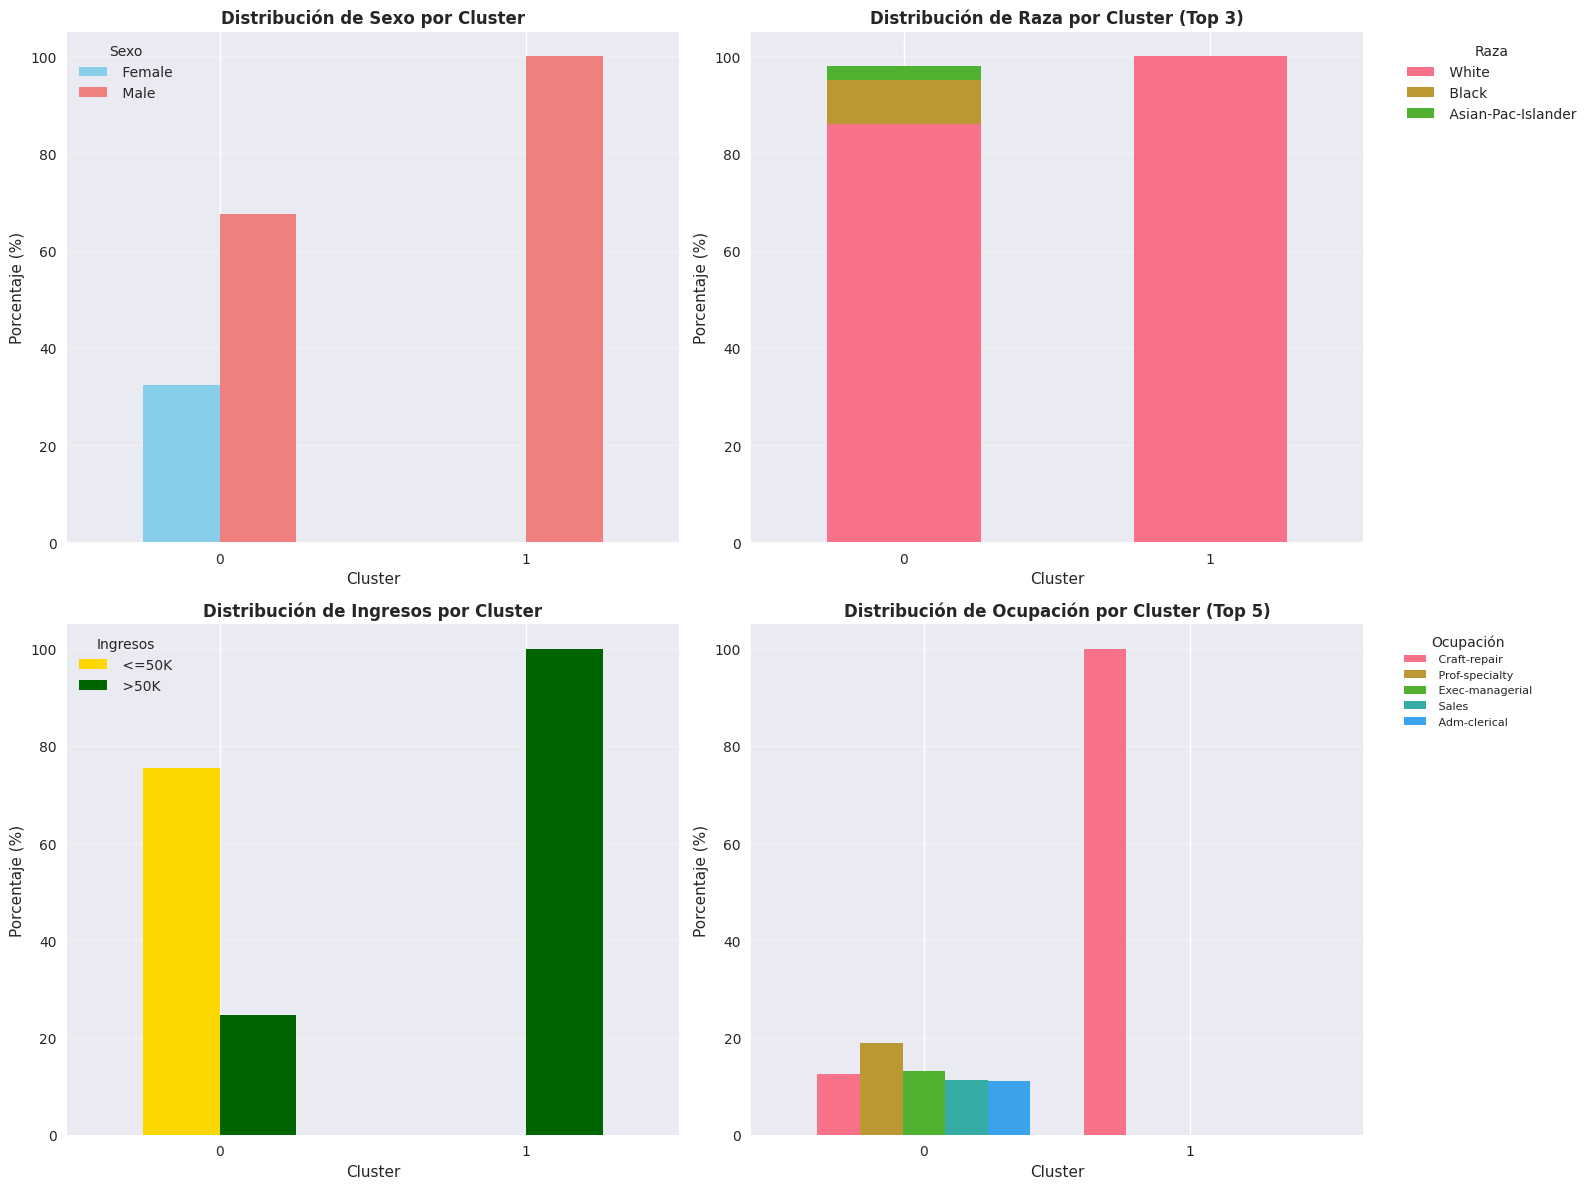

In [35]:
print("VISUALIZACIÓN: COMPOSICIÓN POR SEXO Y RAZA - MUESTRA 5K")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Composición por sexo por cluster
sex_crosstab = pd.crosstab(sample_5k_data['cluster'], sample_5k_data['sex'], normalize='index') * 100
sex_crosstab.plot(kind='bar', ax=axes[0, 0], color=['skyblue', 'lightcoral'])
axes[0, 0].set_title('Distribución de Sexo por Cluster', fontweight='bold')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Porcentaje (%)')
axes[0, 0].legend(title='Sexo')
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

# Composición por raza por cluster (top 3 razas)
race_crosstab = pd.crosstab(sample_5k_data['cluster'], sample_5k_data['race'], normalize='index') * 100
top_races = race_crosstab.sum().nlargest(3).index
race_crosstab[top_races].plot(kind='bar', ax=axes[0, 1], stacked=True)
axes[0, 1].set_title('Distribución de Raza por Cluster (Top 3)', fontweight='bold')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Porcentaje (%)')
axes[0, 1].legend(title='Raza', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 1].grid(True, alpha=0.3, axis='y')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

# Composición por ingresos por cluster
income_crosstab = pd.crosstab(sample_5k_data['cluster'], sample_5k_data['income'], normalize='index') * 100
income_crosstab.plot(kind='bar', ax=axes[1, 0], color=['gold', 'darkgreen'])
axes[1, 0].set_title('Distribución de Ingresos por Cluster', fontweight='bold')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Porcentaje (%)')
axes[1, 0].legend(title='Ingresos')
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

# Composición por ocupación por cluster (top 5 ocupaciones)
occ_crosstab = pd.crosstab(sample_5k_data['cluster'], sample_5k_data['occupation'], normalize='index') * 100
top_occ = occ_crosstab.sum().nlargest(5).index
occ_crosstab[top_occ].plot(kind='bar', ax=axes[1, 1], width=0.8)
axes[1, 1].set_title('Distribución de Ocupación por Cluster (Top 5)', fontweight='bold')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Porcentaje (%)')
axes[1, 1].legend(title='Ocupación', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()


VISUALIZACIÓN: COMPOSICIÓN POR SEXO Y RAZA - MUESTRA 10K


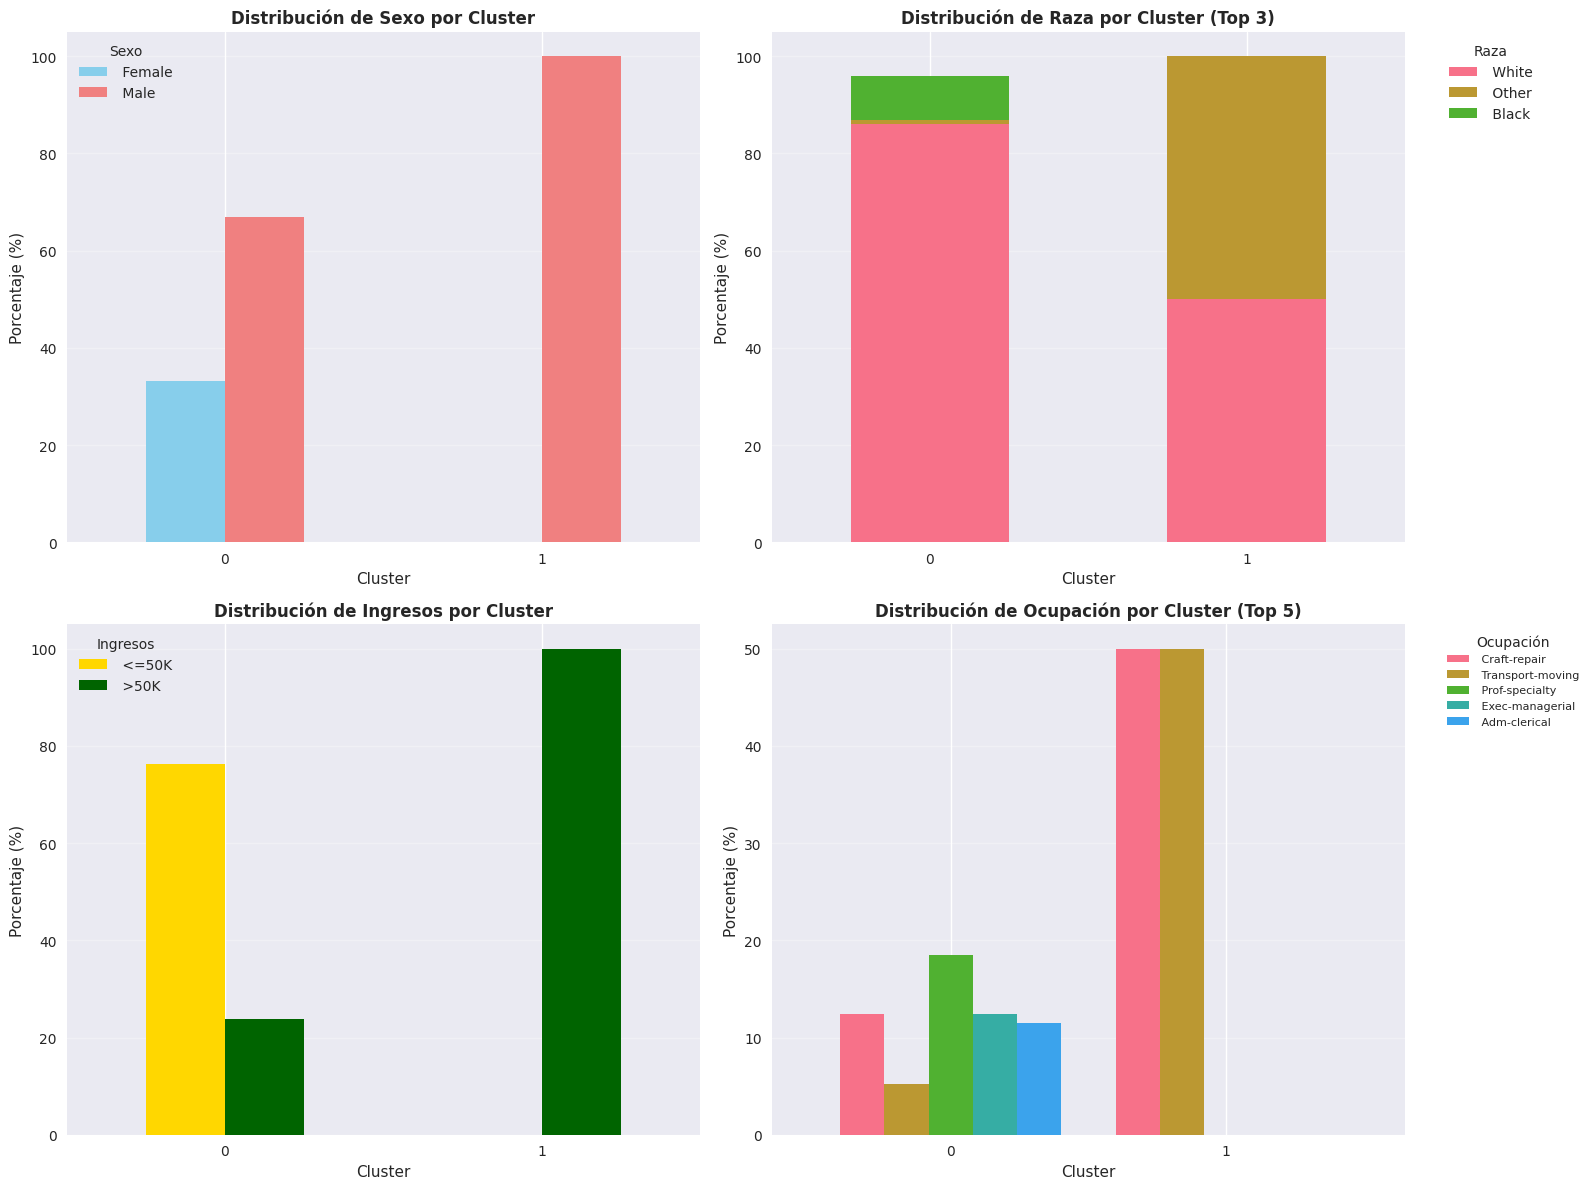

In [36]:
print("VISUALIZACIÓN: COMPOSICIÓN POR SEXO Y RAZA - MUESTRA 10K")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Composición por sexo por cluster
sex_crosstab = pd.crosstab(sample_10k_data['cluster'], sample_10k_data['sex'], normalize='index') * 100
sex_crosstab.plot(kind='bar', ax=axes[0, 0], color=['skyblue', 'lightcoral'])
axes[0, 0].set_title('Distribución de Sexo por Cluster', fontweight='bold')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Porcentaje (%)')
axes[0, 0].legend(title='Sexo')
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

# Composición por raza por cluster (top 3 razas)
race_crosstab = pd.crosstab(sample_10k_data['cluster'], sample_10k_data['race'], normalize='index') * 100
top_races = race_crosstab.sum().nlargest(3).index
race_crosstab[top_races].plot(kind='bar', ax=axes[0, 1], stacked=True)
axes[0, 1].set_title('Distribución de Raza por Cluster (Top 3)', fontweight='bold')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Porcentaje (%)')
axes[0, 1].legend(title='Raza', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 1].grid(True, alpha=0.3, axis='y')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

# Composición por ingresos por cluster
income_crosstab = pd.crosstab(sample_10k_data['cluster'], sample_10k_data['income'], normalize='index') * 100
income_crosstab.plot(kind='bar', ax=axes[1, 0], color=['gold', 'darkgreen'])
axes[1, 0].set_title('Distribución de Ingresos por Cluster', fontweight='bold')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Porcentaje (%)')
axes[1, 0].legend(title='Ingresos')
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

# Composición por ocupación por cluster (top 5 ocupaciones)
occ_crosstab = pd.crosstab(sample_10k_data['cluster'], sample_10k_data['occupation'], normalize='index') * 100
top_occ = occ_crosstab.sum().nlargest(5).index
occ_crosstab[top_occ].plot(kind='bar', ax=axes[1, 1], width=0.8)
axes[1, 1].set_title('Distribución de Ocupación por Cluster (Top 5)', fontweight='bold')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Porcentaje (%)')
axes[1, 1].legend(title='Ocupación', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()


In [37]:
print("ANÁLISIS COMPARATIVO ENTRE MUESTRAS")
print("="*60)

comparison_data = {
    'Métrica': [
        'k óptimo (Silhouette)',
        'k óptimo (Davies-Bouldin)',
        'Silhouette Score final',
        'Davies-Bouldin Score final',
        'Número de clusters únicos',
        'Tamaño mínimo de cluster',
        'Tamaño máximo de cluster',
        'Desbalance entre clusters'
    ],
    'Muestra 5K': [
        optimal_k_5k,
        optimal_k_db_5k,
        f'{silhouette_final_5k:.4f}',
        f'{davies_bouldin_final_5k:.4f}',
        len(np.unique(labels_5k)),
        np.min([np.sum(labels_5k == i) for i in np.unique(labels_5k)]),
        np.max([np.sum(labels_5k == i) for i in np.unique(labels_5k)]),
        f'{np.max([np.sum(labels_5k == i) for i in np.unique(labels_5k)]) / np.min([np.sum(labels_5k == i) for i in np.unique(labels_5k)]):.2f}x'
    ],
    'Muestra 10K': [
        optimal_k_10k,
        optimal_k_db_10k,
        f'{silhouette_final_10k:.4f}',
        f'{davies_bouldin_final_10k:.4f}',
        len(np.unique(labels_10k)),
        np.min([np.sum(labels_10k == i) for i in np.unique(labels_10k)]),
        np.max([np.sum(labels_10k == i) for i in np.unique(labels_10k)]),
        f'{np.max([np.sum(labels_10k == i) for i in np.unique(labels_10k)]) / np.min([np.sum(labels_10k == i) for i in np.unique(labels_10k)]):.2f}x'
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

print("\nCONCLUSIONES:")
print("-" * 60)
print(f"Ambas muestras muestran estabilidad en k óptimo:")
print(f"  - Muestra 5K: k={optimal_k_5k}")
print(f"  - Muestra 10K: k={optimal_k_10k}")
print(f"\nMétricas de calidad:")
print(f"  - Silhouette: {'Similares' if abs(silhouette_final_5k - silhouette_final_10k) < 0.05 else 'Diferentes'}")
print(f"  - Davies-Bouldin: {'Similares' if abs(davies_bouldin_final_5k - davies_bouldin_final_10k) < 0.05 else 'Diferentes'}")


ANÁLISIS COMPARATIVO ENTRE MUESTRAS
                   Métrica Muestra 5K Muestra 10K
     k óptimo (Silhouette)          2           2
 k óptimo (Davies-Bouldin)          2           2
    Silhouette Score final     0.3430      0.3457
Davies-Bouldin Score final     0.5000      0.7091
 Número de clusters únicos          2           2
  Tamaño mínimo de cluster          1           2
  Tamaño máximo de cluster       4999        9998
 Desbalance entre clusters   4999.00x    4999.00x

CONCLUSIONES:
------------------------------------------------------------
Ambas muestras muestran estabilidad en k óptimo:
  - Muestra 5K: k=2
  - Muestra 10K: k=2

Métricas de calidad:
  - Silhouette: Similares
  - Davies-Bouldin: Diferentes
